In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv('CTC.csv')  
df.head()

,CTC
0,140000
1,140000
2,140000
3,140000
4,140000


In [28]:
df['CTC'] = pd.to_numeric(df['CTC'], errors='coerce')

In [29]:
df.nunique()

CTC    263
dtype: int64

In [30]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,CTC
count,1470.00
mean,2173483.99
std,1687870.41
min,140000.00
25%,1220000.00
50%,1690000.00
75%,2585175.75
max,16978000.00


In [31]:
bin_width = 50000
min_ctc = df['CTC'].min()
max_ctc = df['CTC'].max()
bins = np.arange(min_ctc, max_ctc + bin_width, bin_width)

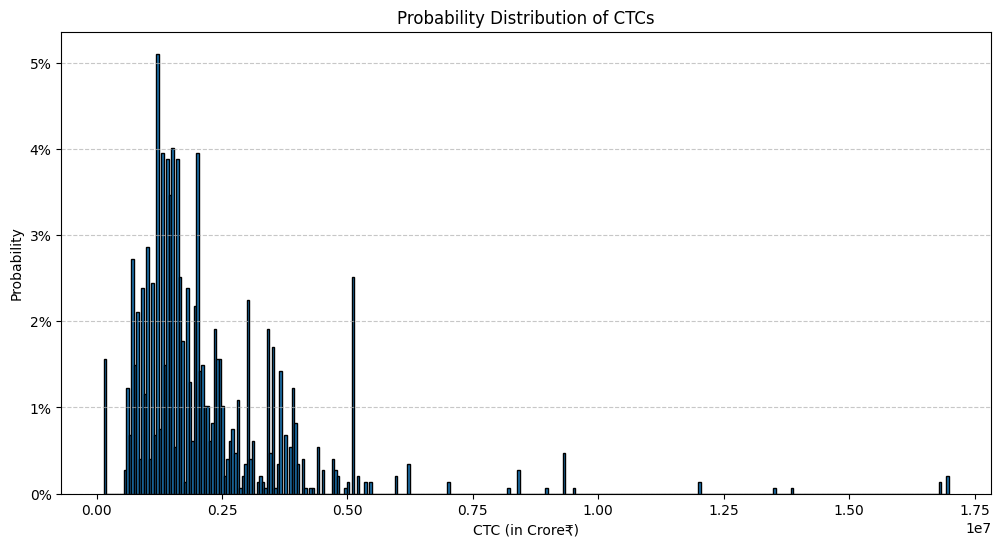

In [32]:
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['CTC'], bins=bins, weights=np.ones(len(df)) / len(df), edgecolor='black')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.xlabel('CTC (in Crore₹)')
plt.ylabel('Probability')
plt.title('Probability Distribution of CTCs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [33]:
hist, bin_edges = np.histogram(df['CTC'], bins=bins)
cum_counts = np.cumsum(hist)
cum_prob = cum_counts / cum_counts[-1]


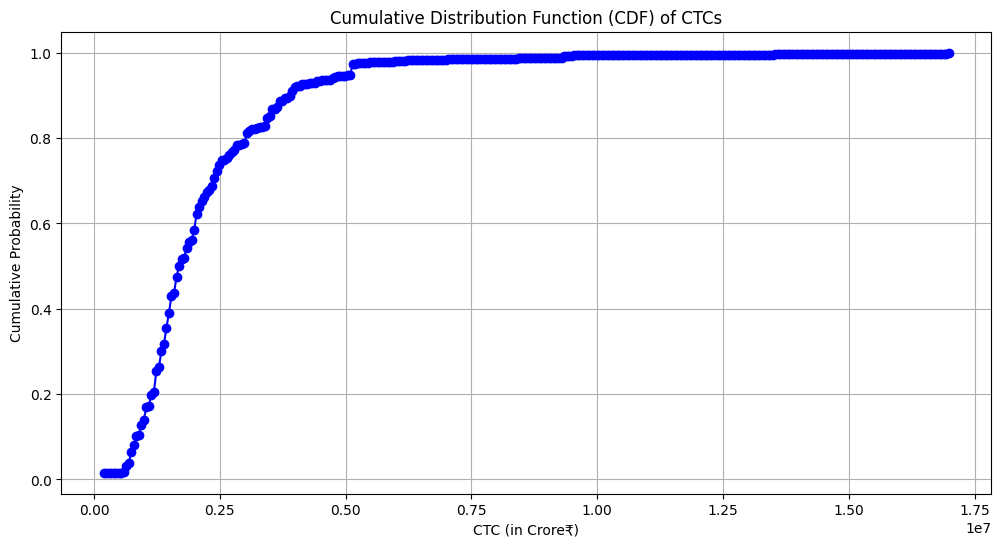

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(bin_edges[1:], cum_prob, marker='o', linestyle='-', color='b')
plt.xlabel('CTC (in Crore₹)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of CTCs')
plt.grid(True)
plt.show()


In [35]:
ctc_data = df['CTC'].dropna().values  
x = np.linspace(ctc_data.min(), ctc_data.max(), 1000)

In [36]:
from scipy.stats import lognorm, gamma, weibull_min, fisk, betaprime  

In [37]:
sorted_ctc = np.sort(ctc_data)
empirical_cdf = np.arange(1, len(sorted_ctc) + 1) / len(sorted_ctc)
distributions = {
    'Lognormal': lognorm,
    'Gamma': gamma,
    'Weibull': weibull_min,
    'Loglogistic': fisk,
    'Beta Prime': betaprime
}

In [38]:
fitted_cdfs = {}
for name, dist in distributions.items():
    params = dist.fit(ctc_data)
    fitted_cdfs[name] = dist.cdf(x, *params)

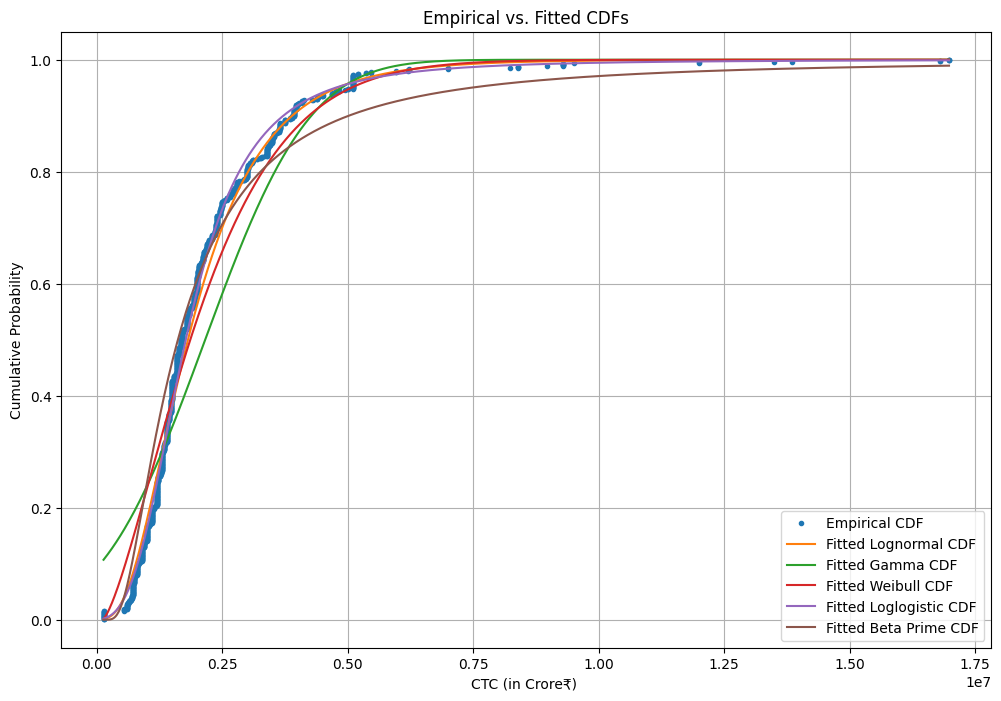

In [39]:
plt.figure(figsize=(12, 8))

plt.plot(sorted_ctc, empirical_cdf, marker='.', linestyle='none', label='Empirical CDF')

for name, cdf in fitted_cdfs.items():
    plt.plot(x, cdf, label=f'Fitted {name} CDF')

plt.xlabel('CTC (in Crore₹) ')
plt.ylabel('Cumulative Probability')
plt.title('Empirical vs. Fitted CDFs')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
fitted_pdfs = {}
for name, dist in distributions.items():
    params = dist.fit(ctc_data)
    fitted_pdfs[name] = dist.pdf(x, *params)

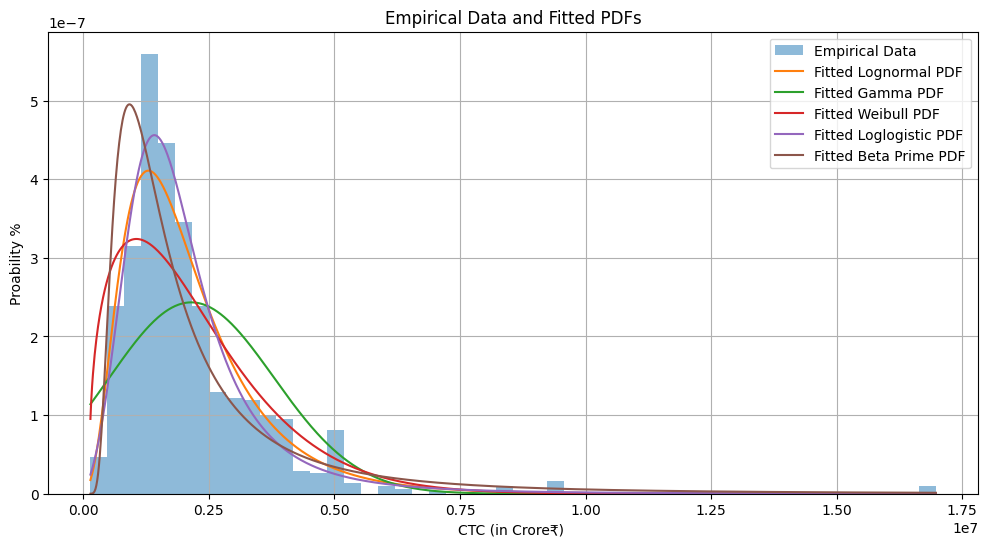

In [41]:
plt.figure(figsize=(12, 6))
plt.hist(ctc_data, bins=50, density=True, alpha=0.5, label='Empirical Data')
for name, pdf in fitted_pdfs.items():
    plt.plot(x, pdf, label=f'Fitted {name} PDF')
plt.xlabel('CTC (in Crore₹) ')
plt.ylabel('Proability %')
plt.title('Empirical Data and Fitted PDFs')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
#Parameters of LogNormal Distribution
params = lognorm.fit(ctc_data)  
sigma, loc, scale = params


mu = np.log(scale)

print("Parameters of the Lognormal Distribution:")
print("mu (u):", mu)
print("sigma:", sigma)

Parameters of the Lognormal Distribution:
mu (u): 14.548469203444098
sigma: 0.5396782778021177


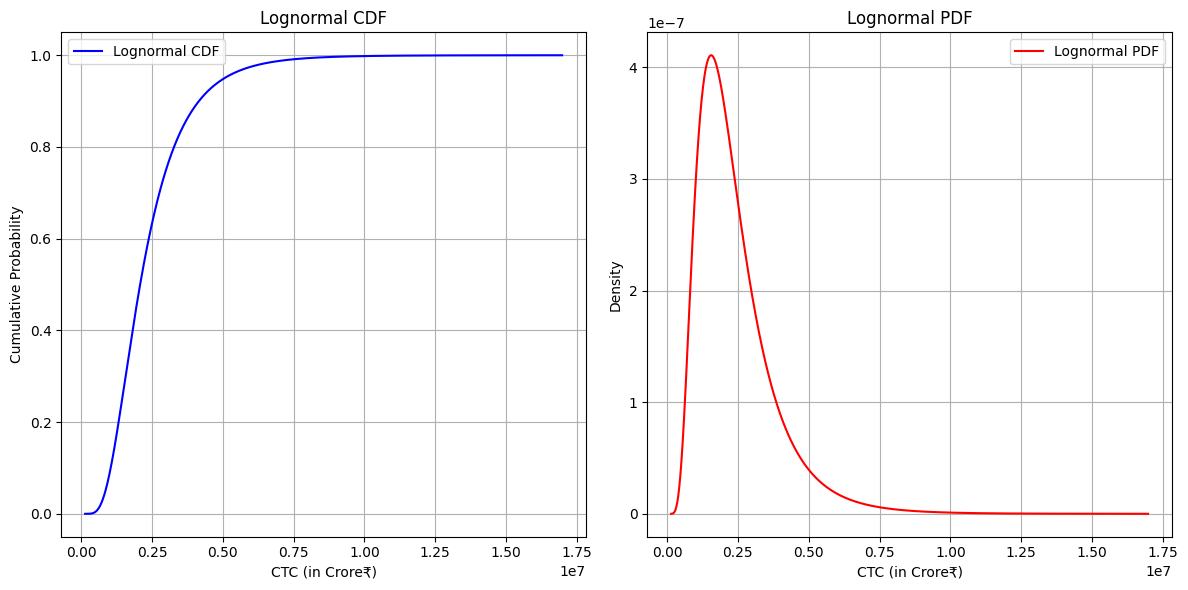

In [43]:
plt.figure(figsize=(12, 6))

# Plot Lognormal CDF
plt.subplot(1, 2, 1)
cdf = lognorm.cdf(x, s=sigma, scale=scale)
plt.plot(x, cdf, label='Lognormal CDF', color='blue')
plt.xlabel('CTC (in Crore₹)')
plt.ylabel('Cumulative Probability')
plt.title('Lognormal CDF')
plt.grid(True)
plt.legend()

# Plot Lognormal PDF
plt.subplot(1, 2, 2)
pdf = lognorm.pdf(x, s=sigma, scale=scale)
plt.plot(x, pdf, label='Lognormal PDF', color='red')
plt.xlabel('CTC (in Crore₹)')
plt.ylabel('Density')
plt.title('Lognormal PDF')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
median_ctc = lognorm.ppf(0.5, s=sigma, scale=scale)
mean_ctc = lognorm.mean(s=sigma, scale=scale)

print("Median CTC using Lognormal distribution:", median_ctc)
print("Mean CTC using Lognormal distribution:", mean_ctc)

Median CTC using Lognormal distribution: 2081229.1266931589
Mean CTC using Lognormal distribution: 2407490.6169204344


In [45]:
actual_mean = np.mean(df['CTC'].dropna())
actual_median = np.median(df['CTC'].dropna())
actual_mode = df['CTC'].mode().iloc[0]
lognorm_mode = scale * np.exp(- sigma**2)

print("Actual mean CTC:", actual_mean)
print("Lognormal mean CTC:", mean_ctc)
print("Actual median CTC:", actual_median)
print("Lognormal median CTC:", median_ctc)
print("Actual mode CTC:", actual_mode)
print("Lognormal mode:", lognorm_mode)

Actual mean CTC: 2173483.9918367346
Lognormal mean CTC: 2407490.6169204344
Actual median CTC: 1690000.0
Lognormal median CTC: 2081229.1266931589
Actual mode CTC: 1200000
Lognormal mode: 1555358.4008694799


In [46]:
actual_std = np.std(df['CTC'].dropna(), ddof=1)
mu = np.log(scale)
lognorm_std = np.sqrt((np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2))
print("Standard deviation of actual data:", actual_std)
print("Standard deviation using Lognormal distribution:", lognorm_std)

Standard deviation of actual data: 1687870.4069171832
Standard deviation using Lognormal distribution: 1399873.7218130967


In [47]:
# Computing LSS by empirical cdf and fitted curve
empirical_cdf_interp = np.interp(x, sorted_ctc, empirical_cdf)

ls_errors = {}
for name, fitted_cdf in fitted_cdfs.items():
    error = np.sum((fitted_cdf - empirical_cdf_interp) ** 2)
    ls_errors[name] = error
    print(f"{name} LS error: {error:.6f}")

best_distribution = min(ls_errors, key=ls_errors.get)
print(f"Best fitting distribution: {best_distribution} with LS error: {ls_errors[best_distribution]:.6f}")

Lognormal LS error: 0.176467
Gamma LS error: 2.808054
Weibull LS error: 0.822884
Loglogistic LS error: 0.100936
Beta Prime LS error: 1.306376
Best fitting distribution: Loglogistic with LS error: 0.100936
